In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
import io
from sklearn.preprocessing import StandardScaler

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

grab dataset

In [116]:
data = pd.read_csv('/content/sample_data/modified_data (1).csv')

In [117]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Prepare the data set
find missing values

In [118]:
data.drop('Id',axis=1,inplace=True)

In [119]:
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


In [120]:
data.shape

(1460, 76)

In [121]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [122]:
original_features=list(data.columns)
original_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [123]:
features_with_missing=list(data.columns[data.isna().any()])
features_with_missing
len(features_with_missing)

15

In [124]:
len(data)

1460

In [125]:
for feature in features_with_missing:
 print(feature,' ',data[feature].isna().sum()/len(data)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [126]:
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True)

In [127]:
mean_fill=['LotFrontage', 'MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill))

In [128]:
ffill

['BsmtCond',
 'BsmtFinType1',
 'GarageQual',
 'BsmtQual',
 'BsmtExposure',
 'Electrical',
 'MasVnrType',
 'GarageYrBlt',
 'GarageCond',
 'BsmtFinType2',
 'GarageFinish',
 'GarageType']

In [129]:
for feature in mean_fill:
 data[feature].fillna(data[feature].mean(),inplace=True)

In [130]:
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True)

In [131]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [132]:
data.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

# Encode The dataset

In [133]:
cat_dat=data.select_dtypes(include=['object']).copy()
cat_dat.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [134]:
cat_features=list(cat_dat.columns)
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [135]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal=list(set(cat_features)-set(nominal))
numerical=list(set(original_features)-set(cat_features))
target=['SalePrice']

In [136]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [137]:
for feature in ordinal:
  data[feature]=(data[feature].astype('category')).cat.codes

In [138]:
data[nominal]

,MSZoning,LandContour,LotConfig,Neighborhood
0,RL,Lvl,Inside,CollgCr
1,RL,Lvl,FR2,Veenker
2,RL,Lvl,Inside,CollgCr
3,RL,Lvl,Corner,Crawfor
4,RL,Lvl,FR2,NoRidge
...,...,...,...,...
1455,RL,Lvl,Inside,Gilbert
1456,RL,Lvl,Inside,NWAmes
1457,RL,Lvl,Inside,Crawfor
1458,RL,Lvl,Inside,NAmes



# Data Normalisation

In [139]:
df_nominal=pd.get_dummies(data[nominal])

In [140]:
df_ordinal=data[ordinal]

In [141]:
df_numerical=data[numerical]

In [142]:
encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)

In [143]:
encoded_data.head(3)

,MasVnrArea,BsmtHalfBath,YearBuilt,GrLivArea,OverallCond,WoodDeckSF,KitchenAbvGr,LotArea,GarageYrBlt,BsmtFinSF1,YearRemodAdd,TotalBsmtSF,2ndFlrSF,BsmtFinSF2,MiscVal,PoolArea,SalePrice,HalfBath,BsmtFullBath,LowQualFinSF,MSSubClass,BsmtUnfSF,3SsnPorch,EnclosedPorch,BedroomAbvGr,GarageCars,MoSold,FullBath,Fireplaces,OpenPorchSF,LotFrontage,GarageArea,TotRmsAbvGrd,1stFlrSF,OverallQual,ScreenPorch,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,CentralAir,FireplaceQu,HeatingQC,PavedDrive,BsmtExposure,Electrical,Functional,ExterQual,RoofStyle,BldgType,LotShape,Exterior2nd,Condition1,GarageQual,HouseStyle,Heating,Utilities,SaleCondition,BsmtQual,GarageFinish,RoofMatl,BsmtCond,ExterCond,MasVnrType,GarageType,BsmtFinType2,Exterior1st,SaleType,BsmtFinType1,LandSlope,KitchenQual,Foundation,Street,Condition2,GarageCond
0,196.0,0,2003,1710,5,0,1,8450,2003.0,706,2003,856,854,0,0,0,208500,1,1,0,60,150,0,0,3,2,2,2,0,61,65.0,548,8,856,7,0,2008,0,0,0,...,0,0,0,0,0,1,4,0,2,3,4,6,2,1,0,3,13,2,4,5,1,0,4,2,1,1,3,4,1,1,5,12,8,2,0,2,2,1,2,4
1,0.0,1,1976,1262,8,298,1,9600,1976.0,978,1976,1262,0,0,0,0,181500,0,0,0,20,284,0,0,3,2,5,2,1,0,80.0,460,6,1262,6,0,2007,0,0,0,...,0,0,0,0,1,1,4,0,2,1,4,6,3,1,0,3,8,1,4,2,1,0,4,2,1,1,3,4,2,1,5,8,8,0,0,3,1,1,2,4
2,162.0,0,2001,1786,5,0,1,11250,2001.0,486,2002,920,866,0,0,0,223500,1,1,0,60,434,0,0,3,2,9,2,1,42,68.0,608,6,920,7,0,2008,0,0,0,...,0,0,0,0,0,1,4,0,2,2,4,6,2,1,0,0,13,2,4,5,1,0,4,2,1,1,3,4,1,1,5,12,8,2,0,2,2,1,2,4


In [144]:
encoded_data.shape

(1460, 111)

In [145]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


# Data normalisation

In [146]:
x=encoded_data.drop('SalePrice', axis=1)

In [147]:
y=data[target]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [148]:
x=x.to_numpy()
x

array([[1.960e+02, 0.000e+00, 2.003e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 1.000e+00, 1.976e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [1.620e+02, 0.000e+00, 2.001e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.941e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.950e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00],
       [0.000e+00, 0.000e+00, 1.965e+03, ..., 1.000e+00, 2.000e+00,
        4.000e+00]])

In [149]:
y=y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [150]:
x.shape

(1460, 110)

In [151]:
y.shape

(1460, 1)

In [152]:
x=StandardScaler().fit_transform(x)
y=StandardScaler().fit_transform(y)

In [153]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# PCA Dimensionality Reduction

In [154]:
pca=PCA(n_components=2)
p_components=pca.fit_transform(x)

In [155]:
p_components

array([[ 2.40853779, -1.33001677],
       [ 0.4319559 ,  2.6210839 ],
       [ 2.82844706, -0.85535847],
       ...,
       [ 1.25988503, -0.86760928],
       [-2.83065768,  3.1817956 ],
       [-0.75664184,  2.68187393]])

In [156]:
pca.explained_variance_ratio_

array([0.10207313, 0.04345606])

In [157]:
pca_var=PCA(0.9)
new_pcs=pca_var.fit_transform(x)

In [158]:
pca_var.n_components_

70

# L1 regularization

In [159]:
regressor = LassoCV()
regressor.fit(p_components,y)
regressor.coef_

array([0.25351583, 0.01758906])



# Splitting and training of dataset

In [160]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [161]:
model = Sequential()
model.add(Dense(256, input_dim=110, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 256)               28416     
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 257       
Total params: 160,257
Trainable params: 160,257
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [163]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 1s 10ms/step - loss: 0.4958 - val_loss: 0.1586
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1408 - val_loss: 0.1383
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0592 - val_loss: 0.1296
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.1528
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.1181
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.1178
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0148 - val_loss: 0.1319
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.1145
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.1065
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.1152
Epoch 11/20
32/32 

In [164]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


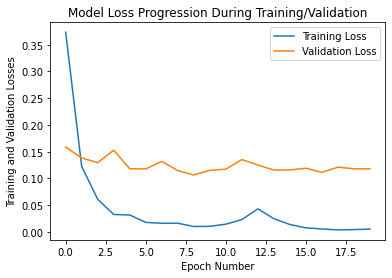

In [165]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
